Building an Image Classifier using CNN

#Setup

In [1]:
import tensorflow as tf
from tensorflow import keras
import sklearn
import numpy as np
np.random.seed(42)
import matplotlib as mpl
import matplotlib.pyplot as plt

import kagglehub
import os
import pandas as pd
from tensorflow.keras.utils import image_dataset_from_directory


In [2]:
path = kagglehub.dataset_download("alessiocorrado99/animals10")

train_ds = image_dataset_from_directory(f"{path}/raw-img", validation_split=0.2,subset="training",seed=67,image_size=(224, 224),batch_size=32)
test_ds = image_dataset_from_directory(f"{path}/raw-img",validation_split=0.2,subset="validation",seed=67,image_size=(224, 224),batch_size=32)

Using Colab cache for faster access to the 'animals10' dataset.
Found 26179 files belonging to 10 classes.
Using 20944 files for training.
Found 26179 files belonging to 10 classes.
Using 5235 files for validation.


# Build a neural network model

Model w/ Transfer Learning

In [3]:
base_model = tf.keras.applications.EfficientNetB1(input_shape=(224, 224, 3),include_top=False,weights="imagenet")
base_model.trainable = True
for layer in base_model.layers[:-30]:
    layer.trainable = False

transfer = tf.keras.Sequential([
    tf.keras.layers.Input(shape=(224, 224, 3)),
    tf.keras.layers.RandomFlip("horizontal"),
    tf.keras.layers.RandomRotation(0.05),
    tf.keras.layers.Lambda(tf.keras.applications.efficientnet.preprocess_input),
    base_model,
    tf.keras.layers.GlobalAveragePooling2D(),
    tf.keras.layers.Dense(128, activation="relu",kernel_regularizer=tf.keras.regularizers.l2(1e-4)),
    tf.keras.layers.Dropout(0.3),
    tf.keras.layers.Dense(10, activation="softmax")
])



27018416/27018416 ━━━━━━━━━━━━━━━━━━━━ 2s 0us/step


In [7]:
transfer.summary()

Model: "sequential"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ random_flip (RandomFlip)        │ (None, 224, 224, 3)    │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ random_rotation                 │ (None, 224, 224, 3)    │             0 │
│ (RandomRotation)                │                        │               │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ lambda (Lambda)                 │ (None, 224, 224, 3)    │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ efficientnetb1 (Functional)     │ (None, 7, 7, 1280)     │     6,575,239 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ global_average_pooling2d        │ (None, 1280)           │             0 │
│ (GlobalAveragePooling2D)        │                        │               │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense (Dense)                   │ (None, 128)            │       163,968 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout (Dropout)               │ (None, 128)            │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_1 (Dense)                 │ (None, 10)             │         1,290 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 12,014,631 (45.83 MB)

 Trainable params: 2,637,066 (10.06 MB)

 Non-trainable params: 4,103,431 (15.65 MB)

 Optimizer params: 5,274,134 (20.12 MB)

#compiling the model:


In [5]:
transfer.compile(loss="sparse_categorical_crossentropy",
              optimizer = tf.keras.optimizers.Adam(1e-5),
              metrics=["accuracy"])

# training neural network model:


In [6]:
history = transfer.fit(train_ds, batch_size = 32, epochs=5, validation_data=test_ds)

Epoch 1/5
655/655 ━━━━━━━━━━━━━━━━━━━━ 52s 46ms/step - accuracy: 0.3658 - loss: 1.9488 - val_accuracy: 0.9253 - val_loss: 0.6923
Epoch 2/5
655/655 ━━━━━━━━━━━━━━━━━━━━ 27s 41ms/step - accuracy: 0.8846 - loss: 0.6500 - val_accuracy: 0.9610 - val_loss: 0.2727
Epoch 3/5
655/655 ━━━━━━━━━━━━━━━━━━━━ 27s 41ms/step - accuracy: 0.9240 - loss: 0.3495 - val_accuracy: 0.9692 - val_loss: 0.1762
Epoch 4/5
655/655 ━━━━━━━━━━━━━━━━━━━━ 27s 42ms/step - accuracy: 0.9390 - loss: 0.2627 - val_accuracy: 0.9733 - val_loss: 0.1409
Epoch 5/5
655/655 ━━━━━━━━━━━━━━━━━━━━ 27s 41ms/step - accuracy: 0.9462 - loss: 0.2249 - val_accuracy: 0.9748 - val_loss: 0.1248


#Evaluation



In [8]:
score = transfer.evaluate(test_ds)

164/164 ━━━━━━━━━━━━━━━━━━━━ 4s 25ms/step - accuracy: 0.9752 - loss: 0.1217


In [9]:
print('Total loss on Testing Set:', score[0])

Total loss on Testing Set: 0.12480839341878891


In [10]:
print('Accuracy of Testing Set:', score[1])

Accuracy of Testing Set: 0.9747850894927979


#Predicting the first three images from the test set


1.   print the predicted results of the first three images from the test set
2.   print the real label of the first three images from the test set



In [11]:
for images, labels in test_ds.take(1):
    X_new = images[:3]
    y_true = labels[:3]
y_proba = transfer.predict(X_new)
y_proba.round(2)

1/1 ━━━━━━━━━━━━━━━━━━━━ 3s 3s/step


array([[1.  , 0.  , 0.  , 0.  , 0.  , 0.  , 0.  , 0.  , 0.  , 0.  ],
       [0.  , 0.  , 0.  , 0.98, 0.  , 0.  , 0.  , 0.  , 0.  , 0.  ],
       [1.  , 0.  , 0.  , 0.  , 0.  , 0.  , 0.  , 0.  , 0.  , 0.  ]],
      dtype=float32)

In [12]:
y_proba = transfer.predict(X_new)
y_pred = np.argmax(y_proba, axis=-1)
y_pred

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 48ms/step


array([0, 3, 0])

In [13]:
it_class_names = train_ds.class_names
translate = {"cane": "dog", "cavallo": "horse", "elefante": "elephant", "farfalla": "butterfly", "gallina": "chicken", "gatto": "cat", "mucca": "cow", "pecora": "sheep", "scoiattolo": "squirrel", "dog": "cane", "cavallo": "horse", "elephant" : "elefante", "butterfly": "farfalla", "chicken": "gallina", "cat": "gatto", "cow": "mucca", "spider": "ragno", "squirrel": "scoiattolo"}
class_names = [translate.get(name, name) for name in it_class_names]
class_names

['dog',
 'horse',
 'elephant',
 'butterfly',
 'chicken',
 'cat',
 'cow',
 'sheep',
 'ragno',
 'squirrel']

In [14]:
np.array(class_names)[y_pred]

array(['dog', 'butterfly', 'dog'], dtype='<U9')

In [15]:
y_true

<tf.Tensor: shape=(3,), dtype=int32, numpy=array([0, 3, 0], dtype=int32)>

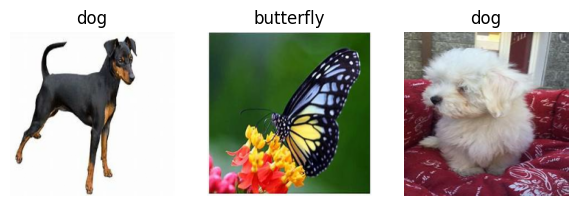

In [16]:
plt.figure(figsize=(7.2, 2.4))
for index, image in enumerate(X_new):
    plt.subplot(1, 3, index + 1)

    img = image / 255.0

    plt.imshow(img)
    plt.axis('off')
    plt.title(class_names[y_pred[index]], fontsize=12)

plt.subplots_adjust(wspace=0.2, hspace=0.5)
plt.show()